In [1]:
import pandas as pd
import re

import nltk
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
from nltk.stem import WordNetLemmatizer 

from sklearn import metrics
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import plot_confusion_matrix

from sklearn.dummy import DummyClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.svm import SVC


from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score


from collections import Counter

nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\asus\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

# Model Selection

1. Dataset is cleaned
2. Description is vectorized using TfIdf and fed into models
3. Dummy, Multinomial Naive Base, Random Forest and Bagging is used
4. Bagging gives the highest accuracy and is hence selected

In [2]:
df=pd.read_csv("task2.csv")                     #Importing and reading dataset

In [3]:
df.head()

,Exploit_Description,class
0,visual studio 2005 is reportedly vulnerable to...,RCE
1,' => %q{ this module uses a valid administrato...,RCE
2,' => %q{ this module exploits a stack buffer o...,RCE
3,exploiting this issue allows remote attackers ...,RCE
4,windows server 2003 enterprise edition service...,RCE


In [4]:
stop_words = stopwords.words("english")                #Function to remove stop words and lemmatize words are initialized
lemmatizer = WordNetLemmatizer()

In [5]:
def preprocess(text, stem=True):                       # Function to removes link, numbers and special characters
    text = re.sub("@\S+|https?:\S+|http?:\S|[^A-Za-z]+", ' ', str(text).lower()).strip()
    tokens = []
    for token in text.split():
        if token not in stop_words:
            if stem:
                tokens.append(lemmatizer.lemmatize(token))
            else:
                tokens.append(token)
    return " ".join(tokens)

In [6]:
df.Exploit_Description = df.Exploit_Description.apply(lambda x: preprocess(x))

In [7]:
df.head()

,Exploit_Description,class
0,visual studio reportedly vulnerable issue vers...,RCE
1,q module us valid administrator username passw...,RCE
2,q module exploit stack buffer overflow datac c...,RCE
3,exploiting issue allows remote attacker execut...,RCE
4,window server enterprise edition service pack ...,RCE


In [8]:
vectorizer = TfidfVectorizer(stop_words={'english'})            #TfIdf matrix calculated
X_train_tfidf = vectorizer.fit_transform(df.Exploit_Description) 
vocab = vectorizer.get_feature_names()

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X_train_tfidf, df['class'], test_size=0.2, random_state=42) 
#Train-Test split 80-20 

C:\Users\asus\anaconda3\envs\CSW_task\lib\site-packages\sklearn\dummy.py:131: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  warnings.warn("The default value of strategy will change from "


              precision    recall  f1-score   support

         DoS       0.56      0.56      0.56         9
          PE       0.57      0.27      0.36        15
         RCE       0.18      0.33      0.24         6
      WebApp       0.54      0.70      0.61        10

    accuracy                           0.45        40
   macro avg       0.46      0.46      0.44        40
weighted avg       0.50      0.45      0.45        40

Accuracy: 0.45
Precision: 0.46
Recall: 0.46
F1 Score: 0.44


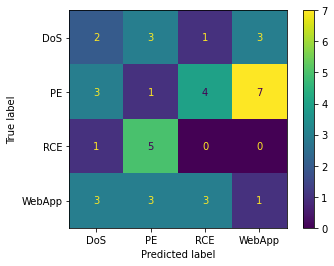

In [10]:
clf = DummyClassifier().fit(X_train, y_train)                   #Dummy Classifier Implemented
y_pred = clf.predict(X_test)

print(classification_report(y_test, y_pred))
print("Accuracy:",metrics.accuracy_score(y_test, y_pred).round(2))
print("Precision:",precision_score(y_test, y_pred,average='macro').round(2))  
print("Recall:",recall_score(y_test, y_pred,average='macro').round(2))     
print("F1 Score:",f1_score(y_test, y_pred,average='macro').round(2))          
plot_confusion_matrix(clf, X_test, y_test)  

              precision    recall  f1-score   support

         DoS       0.83      0.56      0.67         9
          PE       1.00      0.73      0.85        15
         RCE       0.33      0.67      0.44         6
      WebApp       0.82      0.90      0.86        10

    accuracy                           0.73        40
   macro avg       0.75      0.71      0.70        40
weighted avg       0.82      0.72      0.75        40

Accuracy: 0.72
Precision: 0.75
Recall: 0.71
F1 Score: 0.7


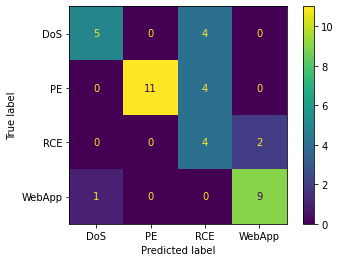

In [11]:
clf = MultinomialNB().fit(X_train, y_train)                          #Multinomial Naive Bayes Classifier Implemented
y_pred = clf.predict(X_test)

print(classification_report(y_test, y_pred))
print("Accuracy:",metrics.accuracy_score(y_test, y_pred).round(2))
print("Precision:",precision_score(y_test, y_pred,average='macro').round(2))  
print("Recall:",recall_score(y_test, y_pred,average='macro').round(2))     
print("F1 Score:",f1_score(y_test, y_pred,average='macro').round(2))          
plot_confusion_matrix(clf, X_test, y_test)  

              precision    recall  f1-score   support

         DoS       1.00      0.89      0.94         9
          PE       0.93      0.87      0.90        15
         RCE       0.83      0.83      0.83         6
      WebApp       0.83      1.00      0.91        10

    accuracy                           0.90        40
   macro avg       0.90      0.90      0.90        40
weighted avg       0.91      0.90      0.90        40

Accuracy: 0.9
Precision: 0.9
Recall: 0.9
F1 Score: 0.9


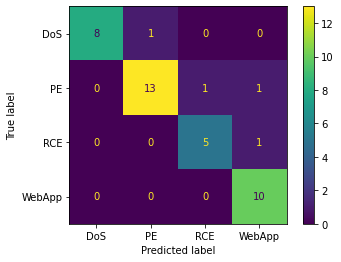

In [12]:
clf = RandomForestClassifier(n_estimators=100, random_state=0).fit(X_train, y_train) #Ramdom Forest Classifier Implemented
y_pred = clf.predict(X_test)

print(classification_report(y_test, y_pred))
print("Accuracy:",metrics.accuracy_score(y_test, y_pred).round(2))
print("Precision:",precision_score(y_test, y_pred,average='macro').round(2))  
print("Recall:",recall_score(y_test, y_pred,average='macro').round(2))     
print("F1 Score:",f1_score(y_test, y_pred,average='macro').round(2))          
plot_confusion_matrix(clf, X_test, y_test)  

              precision    recall  f1-score   support

         DoS       1.00      0.78      0.88         9
          PE       0.88      1.00      0.94        15
         RCE       1.00      0.83      0.91         6
      WebApp       0.91      1.00      0.95        10

    accuracy                           0.93        40
   macro avg       0.95      0.90      0.92        40
weighted avg       0.93      0.93      0.92        40

Accuracy: 0.92
Precision: 0.95
Recall: 0.9
F1 Score: 0.92


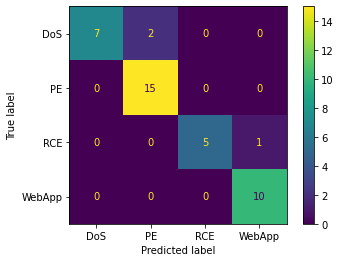

In [13]:
clf = BaggingClassifier(n_estimators=25, random_state=0, warm_start=True).fit(X_train, y_train) #Bagging Classifier Implemented
y_pred = clf.predict(X_test)

print(classification_report(y_test, y_pred))
print("Accuracy:",metrics.accuracy_score(y_test, y_pred).round(2))
print("Precision:",precision_score(y_test, y_pred,average='macro').round(2))  
print("Recall:",recall_score(y_test, y_pred,average='macro').round(2))     
print("F1 Score:",f1_score(y_test, y_pred,average='macro').round(2))          
plot_confusion_matrix(clf, X_test, y_test)  

# Prediction

1. Dataset is cleaned
2. Description is vectorized using TfIdf and fed into models
3. Bagging Model is trained and values are predicted and saved

In [14]:
df1=pd.read_csv("task2_test.csv")                       #Importing and reading dataset
df1.head()

,Exploit_Description
0,Unspecified vulnerability in xtagent.exe in No...
1,Multiple eval injection vulnerabilities in Hyl...
2,Stack-based buffer overflow in WG111v2.SYS in ...
3,The search function in TWiki 20030201 allows r...
4,viewtopic.php in phpBB 2.x before 2.0.11 impro...


In [15]:
stop_words = stopwords.words("english")                  # Remove links,numbers and special characters
lemmatizer = WordNetLemmatizer()
def preprocess(text, stem=True):
    text = re.sub("@\S+|https?:\S+|http?:\S|[^A-Za-z]+", ' ', str(text).lower()).strip()
    tokens = []
    for token in text.split():
        if token not in stop_words:
            if stem:
                tokens.append(lemmatizer.lemmatize(token))
            else:
                tokens.append(token)
    return " ".join(tokens)
df1.Exploit_Description = df1.Exploit_Description.apply(lambda x: preprocess(x))
df1.head()

,Exploit_Description
0,unspecified vulnerability xtagent exe novell n...
1,multiple eval injection vulnerability hylafax ...
2,stack based buffer overflow wg v sys netgear w...
3,search function twiki allows remote attacker e...
4,viewtopic php phpbb x improperly url decodes h...


In [16]:
df1["class"] = ""
df1.head()

,Exploit_Description,class
0,unspecified vulnerability xtagent exe novell n...,
1,multiple eval injection vulnerability hylafax ...,
2,stack based buffer overflow wg v sys netgear w...,
3,search function twiki allows remote attacker e...,
4,viewtopic php phpbb x improperly url decodes h...,


In [17]:
ddf = pd.concat([df,df1],ignore_index=True)

In [18]:
vectorizer = TfidfVectorizer(stop_words={'english'})                      #TfIdf matrix calculated
X_test_tfidf = vectorizer.fit_transform(ddf.Exploit_Description)
vocab = vectorizer.get_feature_names()

In [19]:
X_train= X_test_tfidf[:200]                                               #Train-Test split
y_train= ddf['class'][:200]
X_test= X_test_tfidf[200:]

In [22]:
clf = BaggingClassifier(n_estimators=5).fit(X_train, y_train)             #Bagging Classifier Implemented
y_pred = clf.predict(X_test)

In [24]:
df1=pd.read_csv("task2_test.csv")                                         #Predictions saved to data frame
df1['class']=list(y_pred)
df1.head()

,Exploit_Description,class
0,Unspecified vulnerability in xtagent.exe in No...,RCE
1,Multiple eval injection vulnerabilities in Hyl...,RCE
2,Stack-based buffer overflow in WG111v2.SYS in ...,RCE
3,The search function in TWiki 20030201 allows r...,RCE
4,viewtopic.php in phpBB 2.x before 2.0.11 impro...,RCE


In [ ]:
df1.to_csv("t2.csv",index=False)                                          #Data exported and saved as CSV file